## PARTE 2 – Exercícios adicionais no dataset inicial

### 21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil 
para identificar padrões de comportamento ao longo do tempo

In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv("datasets/household_power_consumption.txt", sep=";")

print(dados.head(10))
dados.info()

C:\Users\Enzo Cerneviva\AppData\Local\Temp\ipykernel_9900\3913165253.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("datasets/household_power_consumption.txt", sep=";")


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   
5  16/12/2006  17:29:00               3.520                 0.522  235.020   
6  16/12/2006  17:30:00               3.702                 0.520  235.090   
7  16/12/2006  17:31:00               3.700                 0.520  235.220   
8  16/12/2006  17:32:00               3.668                 0.510  233.990   
9  16/12/2006  17:33:00               3.662                 0.510  233.860   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1      

In [2]:
columns = dados.columns.to_list()

numeric_columns = ['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

for col in numeric_columns:
    dados[col] = dados[col].replace('?', np.nan)
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

# Garantir que Date e Time sejam strings
dados['Date'] = dados['Date'].astype(str)
dados['Time'] = dados['Time'].astype(str)

# Criar coluna Datetime combinando Date + Time
dados['Datetime'] = pd.to_datetime(dados['Date'] + ' ' + dados['Time'],
                                  format='%d/%m/%Y %H:%M:%S',
                                  errors='coerce')

# Remover colunas antigas
dados.drop(['Date', 'Time'], axis=1, inplace=True)

# Visualizar o resultado
dados.head(10)



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
8,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2006-12-16 17:32:00
9,3.662,0.510,233.86,15.8,0.0,2.0,16.0,2006-12-16 17:33:00


In [3]:
# Definir Datetime como índice
dados.set_index('Datetime', inplace=True)

In [4]:
# Agora resample funciona
dadosEmHoras = dados.resample('H').mean()

mediaGlobalHoraria = dadosEmHoras['Global_active_power'].mean()
print("Média global horária de consumo:", mediaGlobalHoraria)

C:\Users\Enzo Cerneviva\AppData\Local\Temp\ipykernel_9900\4104578106.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dadosEmHoras = dados.resample('H').mean()


Média global horária de consumo: 1.0917275550574597


In [5]:
dados['Hora'] = dados.index.hour

horariosMaiorConsumoMedio = dados.groupby('Hora').mean().sort_values('Global_active_power', ascending=False)

horariosMaiorConsumoMedio[['Global_active_power']].head(5)

,Global_active_power
Hora,
20,1.899064
21,1.877697
19,1.733335
7,1.502246
8,1.461016


### 22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?


In [6]:
serieHoraria = dados['Global_active_power'].resample('H').mean() # Pega a coluna global e transforma em uma coluna com a energia média a cada hora

# lag -> salto de linha, atraso. ex: comparação de um valor com outro com um lag de 1 (salto de uma linha)
 
lag1 = serieHoraria.autocorr(lag=1)
lag24 = serieHoraria.autocorr(lag=24)
lag48 = serieHoraria.autocorr(lag=48)

print("Autocorrelação (1h):", lag1)
print("Autocorrelação (24h):", lag24)
print("Autocorrelação (48h):", lag48)

Autocorrelação (1h): 0.713455594691645
Autocorrelação (24h): 0.435907225911991
Autocorrelação (48h): 0.4012692620450163


C:\Users\Enzo Cerneviva\AppData\Local\Temp\ipykernel_9900\577932508.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serieHoraria = dados['Global_active_power'].resample('H').mean() # Pega a coluna global e transforma em uma coluna com a energia média a cada hora


No lag=1h observamos correlação moderada/alta, indicando continuidade no consumo hora a hora. Porém, no lag=24h a correlação é baixa, o que mostra que não existe uma rotina diária estável no consumo de energia, e que diariamente o consumo tende a mudar um pouco em um mesmo horário.

### 23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols = ['Global_active_power', 'Global_reactive_power', 'Voltage' , 'Global_intensity']
X = dados[cols].dropna()

In [8]:
# Para ajustar a escala das variáveis, tornando-as comparáveis entre si
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 5.19117623,  1.24197621],
       [ 6.69809212,  1.07063122],
       [ 6.89403125,  1.54406762],
       ...,
       [-0.37553128, -1.09962226],
       [-0.36335551, -1.11209907],
       [-0.34637506, -1.12797101]], shape=(2049280, 2))

In [ ]:
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("PC1 - Porcentagem de Representatividade: ", round(pca.explained_variance_ratio_[0] * 100, 2),"%")
print("PC2 - Porcentagem de Representatividade: ", round(pca.explained_variance_ratio_[1] * 100, 2),"%")

Variância explicada por cada componente: [0.59103759 0.22718543]
PC1 - Porcentagem de Representatividade:  59.1 %
PC2 - Porcentagem de Representatividade:  22.72 %


PC1 (Componente 1) → explica 59,1% da variância total dos dados

PC2 (Componente 2) → explica 22,72% da variância total

Juntas → as duas componentes explicam ~81,8% da variância, ou seja, uma boa parte da informação do dataset está concentrada nessas duas dimensões.

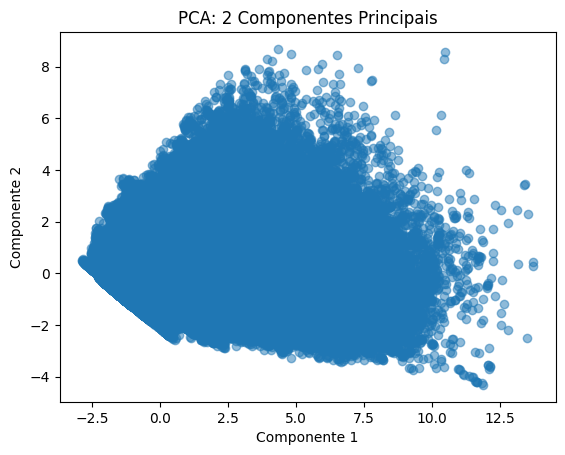

In [73]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA: 2 Componentes Principais')
plt.show()

Maioria dos pontos próximos → consumo típico e previsível da casa, rotina diária normal.

Pontos isolados com CP1 elevado → momentos atípicos ou picos de consumo, que fogem do padrão.

Amplitude maior em CP1 → indica que a maior variação nos dados está relacionada às variáveis que mais pesam nesse componente (provavelmente Global_active_power e Global_intensity).

### 24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?


C:\Users\Enzo Cerneviva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


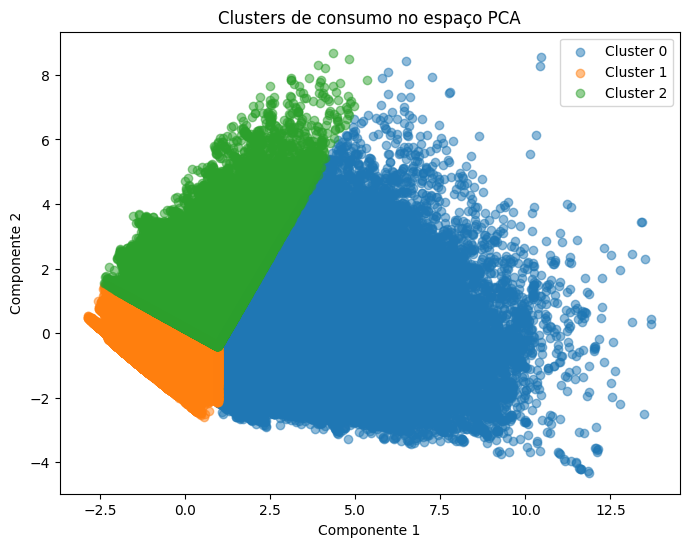

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que X_pca já exista com 2 componentes
# Criar DataFrame para facilitar a manipulação
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Aplicar K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Adicionar coluna de cluster ao DataFrame
df_pca['Cluster'] = clusters

# Plotar os clusters
plt.figure(figsize=(8,6))
for cluster in range(3):
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clusters de consumo no espaço PCA')
plt.legend()
plt.show()


Cluster 2 (PC1 baixo, PC2 baixo) → consumo baixo em geral; faz sentido, pois PC1 é a componente de maior variância.

Cluster 1 (PC1 baixo-médio, PC2 alto) → o consumo de energia não é tão alto, mesmo com PC2 alto, porque PC2 tem menos peso no total da variância.

Cluster 0 (PC1 alto, PC2 variando) → PC1 domina, então qualquer variação de PC2 pouco influencia; pontos com PC1 alto refletem consumo alto, mesmo que PC2 varie.

### 25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

RMSE Linear: 0.969
RMSE Polinomial (grau 2): 0.965


C:\Users\Enzo Cerneviva\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


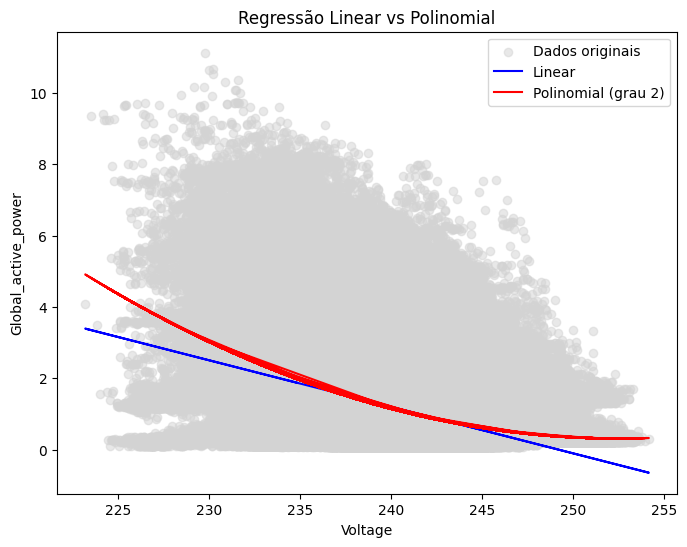

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Selecionar variáveis e remover NaN
X = dados[['Voltage']].dropna().values
y = dados['Global_active_power'].dropna().values

# Certificar que X e y têm o mesmo tamanho
min_len = min(len(X), len(y))
X = X[:min_len]
y = y[:min_len]

# ------------------------------
# Regressão Linear
# ------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))

# ------------------------------
# Regressão Polinomial (grau 2)
# ------------------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

# ------------------------------
# Resultados
# ------------------------------
print(f"RMSE Linear: {rmse_lin:.3f}")
print(f"RMSE Polinomial (grau 2): {rmse_poly:.3f}")

# ------------------------------
# Visualização
# ------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='lightgray', alpha=0.5, label='Dados originais')
plt.plot(X, y_pred_lin, color='blue', label='Linear')
plt.plot(X, y_pred_poly, color='red', label='Polinomial (grau 2)')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('Regressão Linear vs Polinomial')
plt.legend()
plt.show()
